In [1]:
from gensim.models.word2vec import Word2Vec
import numpy
import jieba
import pandas as pd
import numpy as np

以下為將excel資料進行整理，因為日期的部分有些不統一，因此在此轉換為相同格式。

In [2]:
import datetime
from dateutil import parser
def time_correct(data):
    for i in range(len(data)):
        data[i]=str(data[i])
        data[i]=data[i].split(" EDT")[0]
        if (data[i].find("am")>0 or data[i].find("pm")>0):
            data[i]=parser.parse(str(datetime.date.today()))
        else:
            data[i]=parser.parse(data[i])
            
            #print(date)
    #print(data)
    return data

In [3]:
text=[]
data=pd.read_excel("/Users/tyllersun/Desktop/data_science/stock_news.xlsx")
print(data["news"])
new_data=[]
data["news"]=str(data["news"])
data["date"]=time_correct(data["date"])
print(data["date"])

0                                                     NaN
1       (Reuters) - Johnson & Johnson agreed to pay ab...
2       (Reuters) - Allergan Plc Chief Executive Brent...
3       (Reuters) - Business software maker SAP and Ap...
4       (Reuters) - SAP CEO Bill McDermott on Tuesday ...
5       BERLIN/FRANKFURT (Reuters) - German prosecutor...
6       COPENHAGEN (Reuters) - Danish prosecutors have...
7       FRANKFURT (Reuters) - BMW’s first-quarter oper...
8       NEW YORK (Reuters) - Like many transplants to ...
9       (Reuters) - Wall Street’s main indexes tumbled...
10      NEW YORK (Reuters) - Concerns over trade relat...
11      RIO DE JANEIRO (Reuters) - Brazil’s Petroleo B...
12      SAN FRANCISCO/ CAPE TOWN (Reuters) - Uber co-f...
13      BAGHDAD (Reuters) - Iraq is close to signing a...
14      MOSCOW (Reuters) - Iranian Foreign Minister Mo...
15      (Reuters) - General Motors Co’s majority-owned...
16      NEW DELHI (Reuters) - Jet Airways’ pilots’ uni...
17      BEIJIN

此處也是整理資料的部分，去標點符號

In [4]:
import string
 
def removePunctuation(text):
    temp = []
    for c in text:
        if c not in string.punctuation:
            temp.append(c)
    newText = ''.join(temp)
    print(newText)
    b = ''.join(c for c in text if c not in string.punctuation)
    print(b)
    return newText

將新聞利用jieba來進行切割，以利之後word2vec的使用

In [6]:
corpus = [jieba.lcut(d) for d in data["news"] ]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/yx/z4wmf_qn0d1bw1yhfkkg40mh0000gn/T/jieba.cache
Loading model cost 1.000 seconds.
Prefix dict has been built succesfully.


train 一個model出來，找出字與字彼此之間的關係，未來會在每15天的新聞終將最常出現的字丟入model中，找出與其最相近的字詞。

In [7]:
test_model = Word2Vec(corpus)

In [8]:
test_model.wv.vocab.keys()

dict_keys(['0', ' ', 'NaN', '\n', '1', '(', 'Reuters', ')', '-', 'Johnson', '&', 'agreed', 'to', 'pay', 'ab', '...', '2', 'Allergan', 'Plc', 'Chief', 'Executive', 'Brent', '3', 'Business', 'software', 'maker', 'SAP', 'and', 'Ap', '4', 'CEO', 'Bill', 'McDermott', 'on', 'Tuesday', '5', 'BERLIN', '/', 'FRANKFURT', 'German', 'prosecutor', '6', 'COPENHAGEN', 'Danish', 'prosecutors', 'have', '7', 'BMW', '’', 's', 'first', 'quarter', 'oper', '8', 'NEW', 'YORK', 'Like', 'many', 'transplants', '9', 'Wall', 'Street', 'main', 'indexes', 'tumbled', '10', 'Concerns', 'over', 'trade', 'relat', '11', 'RIO', 'DE', 'JANEIRO', 'Brazil', 'Petroleo', 'B', '12', 'SAN', 'FRANCISCO', 'CAPE', 'TOWN', 'Uber', 'co', 'f', '13', 'BAGHDAD', 'Iraq', 'is', 'close', 'signing', 'a', '14', 'MOSCOW', 'Iranian', 'Foreign', 'Minister', 'Mo', '15', 'General', 'Motors', 'Co', 'majority', 'owned', '16', 'DELHI', 'Jet', 'Airways', 'pilots', 'uni', '17', 'BEIJING', 'Nissan', 'Motor', 'premium', '18', 'DUBLIN', 'A', 'push', 'by

利用PCA的方式將文字畫在二為圖表上，但由於此處資料量過多，無法清楚看到彼此之間的關係，但依舊可以
找到一些比較常出現的核心字和一些無用的廢字。

/Users/tyllersun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


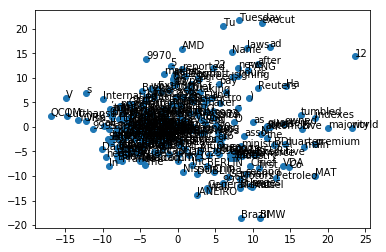

In [18]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
X = test_model[test_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:,0], result[:,1])
words = list(test_model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

以為字圖的方式呈現出最近常出現在新聞板上的單字，呈現出哪些東西最容易去影響到經濟。

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tyllersun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


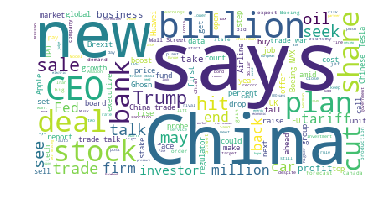

<Figure size 1000x600 with 0 Axes>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def new_text(text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence ="" 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence=filtered_sentence+" "+str(w)
    return filtered_sentence


#print(data["news"]["9"])
data=pd.DataFrame(data)
#print(data.loc[1,"title"])
#print("--------------")
text=""
for i in range(len(data["news"])):
    text=text+data.loc[i,"title"]
#print(text)
text=new_text(text)
#print(text)
stopwords = {}.fromkeys(["with","by","as","on","in","at","and","for","to","of","say","over","after","Reuters","FRANKFURT"])
# 產生文字雲
wc = WordCloud( #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords).generate(text)      
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

以下function可以合成出特定時間的新聞總內容，方邊之後進行情緒分析。

In [69]:
direction=0
def get_partial_article(n):
    global direction
    text=""
    print(text)
    for i in range(direction,direction+n+1):
        try:
            text=text+str(data.loc[i,"news"])
        except:
            continue
    """""
    for i in range(direction,n+1):
        text=text+str(data["news"][i])
    """""
    direction=direction+n
    #print(direction)
    return text

split time這個function除了可以分出每日有多少篇財金新聞之外，還可以對每天進行情緒分析，但目前分析結果每天情感些相近，可能需要將時間軸拉長一點才會有變化。

In [70]:
import nltk
nltk.download('punkt')
polarity=[]
def split_time(now,n,data):
    #print(now)
    input_time=now
    total=0
    count_data=data.groupby("date").count()
    now=str(now).split(" ")[0]
    #print(now)
    total=int(count_data["href"][now])+total
    now=parser.parse(now)
    for i in range(n):
        now=now+datetime.timedelta(days=1)
        now=str(now).split(" ")[0]
        #print(now)
        try:
            total=int(count_data["href"][now])+total
        except:
            break
        now=parser.parse(now)
    text=""
    text=get_partial_article(total)
    #print(get_partial_article(total))
    #print(total)
    print("------------------")
    blot=TextBlob(text) 
    sentiment=blot.sentiment.polarity
    print(sentiment)
    return now,sentiment
    #print("total", total)
    
    #print(count_data)
    #titles=""

[nltk_data] Downloading package punkt to /Users/tyllersun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [71]:
from textblob import TextBlob
time="2018-07-25"
current_time="2019-05-06"
count_data=data.groupby("date").count()
#print(count_data)
data.sort_values(by=["date"])
time=parser.parse(time)
current_time=parser.parse(current_time)
nows=[]
sentiments=[]
for i in range(int(len(data["date"])/15)):
    now,sentiment=split_time(time,15,data)
    nows.append(now)
    sentiments.append(sentiment)
    time=time+datetime.timedelta(days=15)
    if time>current_time:
        time=time-datetime.timedelta(days=(15))
        time=current_time
        break
now,sentiment=split_time(time,15,data)
nows.append(now)
sentiments.append(sentiment)
#blot=TextBlob(text)
#print(blot)


------------------
0.09259641873277878

------------------
0.09259641873277893

------------------
0.09259641873277885

------------------
0.09259641873277863

------------------
0.09259641873277857

------------------
0.092596418732781

------------------
0.09259641873278172

------------------
0.09259641873277984

------------------
0.09259641873278517

------------------
0.09259641873278146

------------------
0.0925964187327813

------------------
0.0925964187327819

------------------
0.09259641873278504

------------------
0.09259641873278351

------------------
0.09259641873278575

------------------
0.09259641873278869

------------------
0.09259641873278411

------------------
0.09259641873278142

------------------
0.09259641873278263

------------------
0.0

------------------
0.0


未來目標：
step1:
將情緒分析進行更加準確的判斷，確認每天的情緒是有差異型
step2:
將情緒與股市進行比對，了解是否股票與情緒的漲跌有關
step3:
若確定情緒與股市漲跌有關，則可以利用前面的model和文字圖來尋找那段時間最長出好的字詞和相關性高的字
step4:
利用這些字詞製作一個model來試圖預測股票未來的漲跌幅
step5:
利用回測來尋找此model的可行信

遇到困難：
1.爬蟲時間過久，且沒有爬足夠的資料，時間不夠
2.bug有點多，需要再次確認程式碼
3.情緒分析結果有點不理想

改善地方：
1.只花兩天時間寫作業，有點太混，導致沒有做出足夠的成果
2.常常爬蟲爬到一半便不小心把電腦關掉，導致蟲爬
3.應該先有大架構在開始做，而不是想到什麼做什麼